In [21]:
import pandas as pd  # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt  # type: ignore

In [22]:
df = pd.read_csv("waiter_tips.csv")
df

,total_bill,tip,gender,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


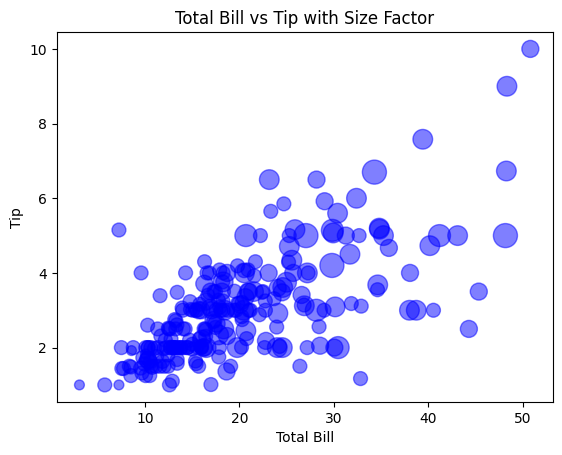

In [23]:
# Plot with marker size corresponding to 'size' column
plt.scatter(df['total_bill'], df['tip'], s=df['size'] * 50, c='blue', alpha=0.5)

plt.title("Total Bill vs Tip with Size Factor")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.show()

In [24]:
x = df[["total_bill", "size"]]
y = df["tip"]
y


0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

In [25]:
from sklearn.model_selection import train_test_split # type: ignore

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [26]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [27]:
reg.fit(x_train, y_train)

LinearRegression()

In [28]:
# Function to predict tip based on user input
def predict_tip():
    # Ask the user for total bill and size
    try:
        total_bill = float(input("Enter the total bill: "))
        size = int(input("Enter the number of customers (size): "))
        
        # Create a DataFrame for prediction
        input_data = pd.DataFrame([[total_bill, size]], columns=["total_bill", "size"])
        
        # Predict the tip using the trained model
        predicted_tip = reg.predict(input_data)
        
        # Output the prediction
        print(f"Predicted tip: ${predicted_tip[0]:.2f}")
        
    except ValueError:
        print("Please enter valid numerical inputs for total bill and size.")

In [29]:
# Call the function to predict the tip
predict_tip()

Predicted tip: $3.11


In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predict the tips on the test set
y_pred = reg.predict(x_test)

# Calculate R-squared
r_squared = reg.score(x_test, y_test)
print(f"R-squared: {r_squared:.2f}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")



R-squared: 0.48
Mean Squared Error: 0.65
Mean Absolute Error: 0.66
